# Задания


## Light


LIGHT


Вариант 1

Перепишите ноутбук по распознаванию рукописных цифр, восстановив следующие операции:
Импорт библиотек.
Загрузка базы mnist.
Нормирование и преобразование x_train и y_train.
Создание нейронной сети.
Обучение нейронной сети.
Можно смотреть в ноутбук с занятия, но код необходимо писать самостоятельно.


Вариант 2

Проведите серию экспериментов по перебору гиперпараметров нейронной сети, созданной на занятии.
Поменяйте количество нейронов в сети, используя следующие значения:
один слой 10 нейронов
один слой 100 нейронов
один слой 5000 нейронов
Поменяйте активационную функцию в скрытых слоях с relu на linear.
Поменяйте размеры batch_size:
1
10
100
Вся база (60000)
Запишите в таблицу получившиеся точности.
Напишите выводы по результатам проведенных тестов.


In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import pylab
from mpl_toolkits.mplot3d import Axes3D
from google.colab import files
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import time

%matplotlib inline

In [ ]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)

x_train = x_train.astype('float32')
x_train = x_train / 255
x_test = x_test.astype('float32')
x_test = x_test / 255

y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

In [ ]:
model = Sequential([
      Dense(400, input_dim=784, activation="relu"),
      Dense(10, activation="softmax")
  ])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1)

Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8699 - loss: 0.4781
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9647 - loss: 0.1280
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9769 - loss: 0.0792
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9852 - loss: 0.0537
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9892 - loss: 0.0384
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9922 - loss: 0.0292
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9945 - loss: 0.0208
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9958 - loss: 0.0175
Epoch 9/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9973 - loss: 0.0132
Epoch 10/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9976 - loss: 0.0107
Epoch 11/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9985 - loss: 0.0082
Epoch 12/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/s

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
True: 4 Pred: 4


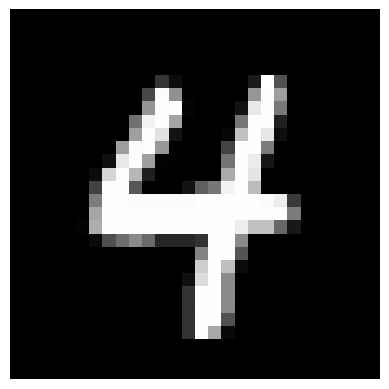

In [ ]:
idx = np.random.randint(0, len(x_test))
sample = x_test[idx].reshape(1, 784)
true_label = y_test[idx].argmax()

pred = model.predict(sample)
pred_label = pred.argmax()

print("True:", true_label, "Pred:", pred_label)

plt.imshow(sample.reshape(28, 28), cmap="gray")
plt.axis("off")
plt.show()

In [ ]:
def model_training(hidden_neurons_count: int, batch_size: int):
  model = Sequential([
      Dense(hidden_neurons_count, input_dim=784, activation="relu"),
      Dense(10, activation="softmax")
  ])
  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
  history = model.fit(x_train, y_train, batch_size=batch_size, epochs=15, verbose=1)

  final_loss = history.history["loss"][-1]
  final_accuracy = history.history["accuracy"][-1]
  print(history.history["accuracy"][-1])

  test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

  results = {
      "final_train_loss": final_loss,
      "final_train_accuracy": final_accuracy,
      "test_loss": test_loss,
      "test_accuracy": test_accuracy
  }

  return results

In [ ]:
train_results = model_training(10, 100)

print(train_results)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.8885 - loss: 0.3599
Epoch 2/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9772 - loss: 0.0751
Epoch 3/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9856 - loss: 0.0459
Epoch 4/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9898 - loss: 0.0323
Epoch 5/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.9920 - loss: 0.0248
Epoch 6/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9923 - loss: 0.0226
Epoch 7/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.9937 - loss: 0.0172
Epoch 8/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9946 - loss: 0.0163
Epoch 9/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9960 - loss: 0.0121
Epoch 10/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.9948 - loss: 0.0154
Epoch 11/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9955 - loss: 0.0149
Epoch 12/15
600/600 ━━━━━━━━━━━

In [ ]:
hidden_neurons_counts = [10, 100, 5000]
batch_sizes = [10, 100, 60000]

train_acc_table = pd.DataFrame(index=batch_sizes, columns=hidden_neurons_counts)
train_loss_table = pd.DataFrame(index=batch_sizes, columns=hidden_neurons_counts)
test_acc_table  = pd.DataFrame(index=batch_sizes, columns=hidden_neurons_counts)


for hidden_neurons_count in hidden_neurons_counts:
  for batch_size in batch_sizes:
    print(f"Hidden neurons count: {hidden_neurons_count}")
    print(f"Batch size: {batch_size}")

    start_time = time.perf_counter()
    train_results = model_training(hidden_neurons_count, batch_size)
    end_time = time.perf_counter()

    elapsed_time = end_time - start_time


    train_acc_table.loc[batch_size, hidden_neurons_count] = train_results["final_train_loss"]
    train_loss_table.loc[batch_size, hidden_neurons_count] = train_results["final_train_accuracy"]
    test_acc_table.loc[batch_size, hidden_neurons_count] = train_results["test_accuracy"]

    print(f"Elapsed time: {elapsed_time:.4f}")
    print('-'*100)

train_acc_table = train_acc_table.astype(float)
train_loss_table = train_loss_table.astype(float)
test_acc_table  = test_acc_table.astype(float)

# Вывод
print("Final Train Accuracy")
display(train_acc_table)
print("\nFinal Train Loss")
display(train_loss_table)
print("\nFinal Test Accuracy")
display(test_acc_table)

Hidden neurons count: 10
Batch size: 10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7801 - loss: 0.7030
Epoch 2/15
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9154 - loss: 0.2858
Epoch 3/15
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9215 - loss: 0.2656
Epoch 4/15
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9288 - loss: 0.2448
Epoch 5/15
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9329 - loss: 0.2301
Epoch 6/15
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9338 - loss: 0.2252
Epoch 7/15
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9354 - loss: 0.2191
Epoch 8/15
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9368 - loss: 0.2148
Epoch 9/15
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9378 - loss: 0.2077
Epoch 10/15
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9409 - loss: 0.2053
Epoch 11/15
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9392 - loss: 0.2004
Epoch 12/15
6000/6000 ━

,10,100,5000
10,0.195159,0.011379,0.024746
100,0.194169,0.015804,0.009769
60000,2.073491,1.099246,0.313875



Final Train Loss


,10,100,5000
10,0.942767,0.995833,0.995817
100,0.946183,0.996367,0.997083
60000,0.298800,0.778100,0.909050



Final Test Accuracy


,10,100,5000
10,0.9326,0.9789,0.9813
100,0.9410,0.9782,0.9759
60000,0.3123,0.8013,0.9160


# Pro

Распознайте рукописную цифру, созданную вами с помощью графического редактора (например, Paint).

Последовательность шагов: В графическом редакторе рисуем произвольную цифру. Сохраняем документ и загружаем его в Collaboratory. С помощью функции image.load_img(path, target_size=(28, 28), color_mode = ‘grayscale’) загружаем картинку в переменную. С помощью функции image.img_to_array(img) преобразуем изображение в numpy-массив. Выполняем инверсию цветов, нормирование и решейп массива. Выполняем распознавание собственной рукописной цифры.

Реализуйте тот же алгоритм для написанной на листе от руки цифры (для этого необходимо сделать дополнительную предобработку изображения).

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import pylab
from mpl_toolkits.mplot3d import Axes3D
from google.colab import files
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline

In [ ]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

x_train = x_train_org.reshape(60000, 784)
x_train = x_train.astype('float32')
x_train = x_train/255

x_test = x_test_org.reshape(10000, 784)
x_test = x_test.astype('float32')
x_test = x_test/255

y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

model = Sequential()
model = Sequential([
      Dense(256, input_dim=784, activation="relu"),
      Dense(10, activation="softmax")
  ])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8424 - loss: 0.5403
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9578 - loss: 0.1461
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9729 - loss: 0.0951
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9795 - loss: 0.0700
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9854 - loss: 0.0529
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9883 - loss: 0.0414
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9916 - loss: 0.0326
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9930 - loss: 0.0272
Epoch 9/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9951 - loss: 0.0198
Epoch 10/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9966 - loss: 0.0158
Epoch 11/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9977 - loss: 0.0126
Epoch 12/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/st

In [ ]:
def getImages(imageNameMode: str = ''):
  images = []
  for i in range(10):
    images.append(Image.open(f'/content/drive/MyDrive/Colab Notebooks/IntellectualSystems/images/{imageNameMode}{i}.png').convert('L'))
  images_count = len(images)
  reshape_images = np.reshape(images, (10, 784))
  return reshape_images, images_count

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
True is: 0, net answer is 0


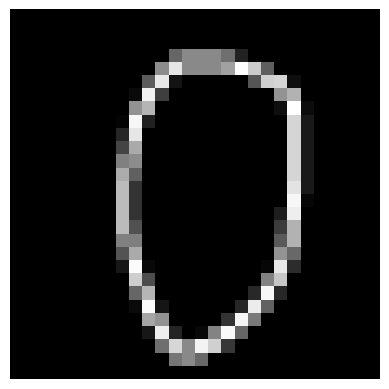



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
True is: 1, net answer is 1


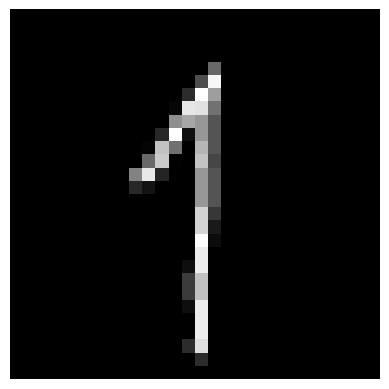



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
True is: 2, net answer is 3


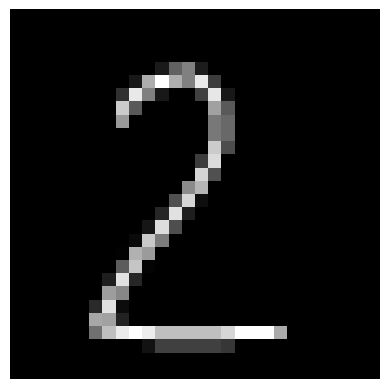



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
True is: 3, net answer is 3


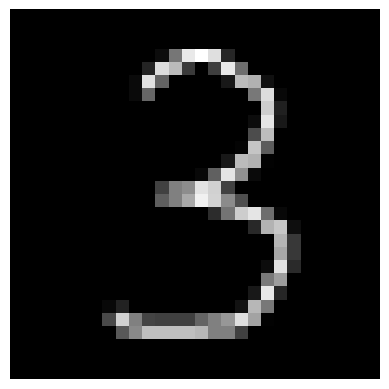



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
True is: 4, net answer is 4


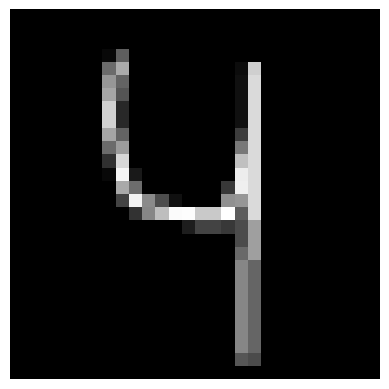



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
True is: 5, net answer is 5


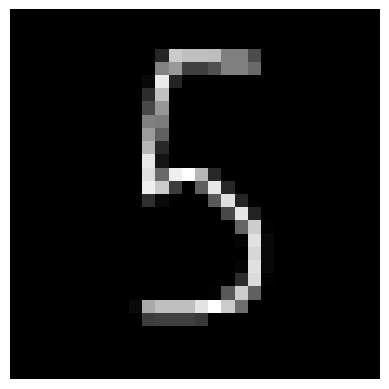



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
True is: 6, net answer is 5


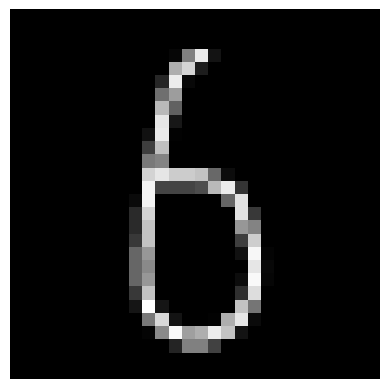



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
True is: 7, net answer is 3


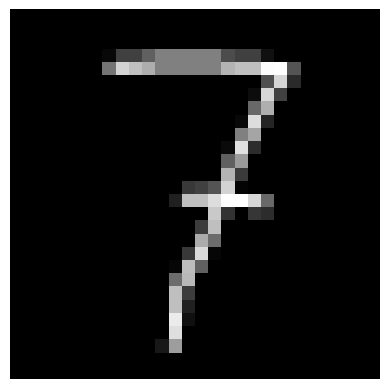



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
True is: 8, net answer is 8


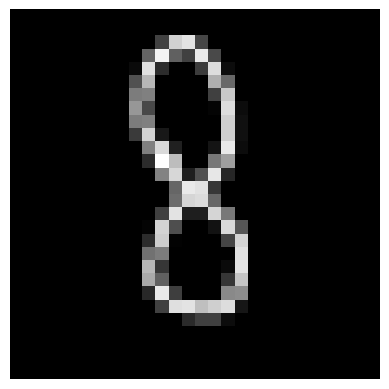



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
True is: 9, net answer is 5


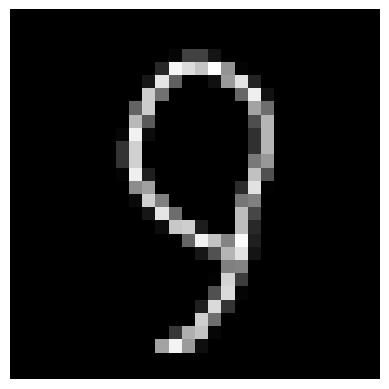



Net Ascending is 0.600000


In [ ]:
reshape_images, images_count = getImages('i')
normalized_images = reshape_images/255

true_predict = 0

for i, image in enumerate(normalized_images):
  sample = image.reshape([1, 784])

  pred = model.predict(sample)
  pred_label = pred.argmax()

  print(f'True is: {i}, net answer is {pred_label}')

  if(i == pred_label):
    true_predict += 1

  plt.imshow(image.reshape(28, 28), cmap="gray")
  plt.axis("off")
  plt.show()
  print('\n')

print(f'Net Ascending is {float(true_predict/images_count):4f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
True is: 0, net answer is 5


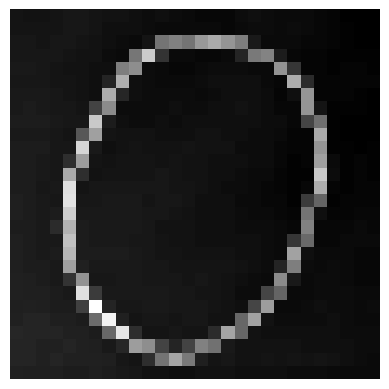



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
True is: 1, net answer is 5


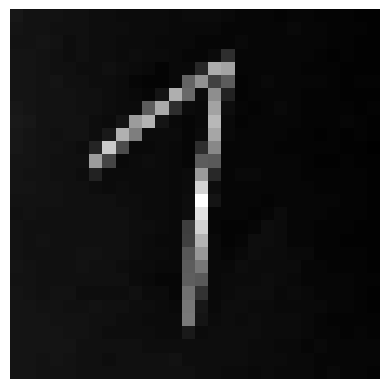



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
True is: 2, net answer is 2


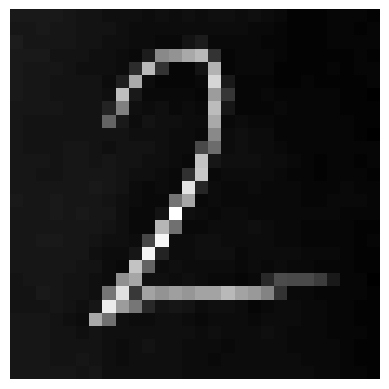



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
True is: 3, net answer is 5


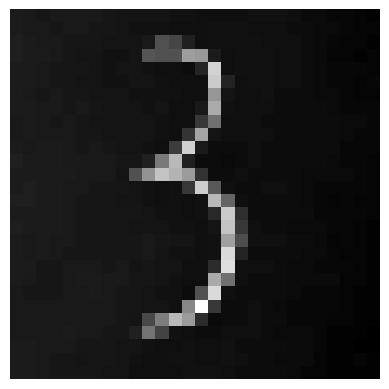



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
True is: 4, net answer is 5


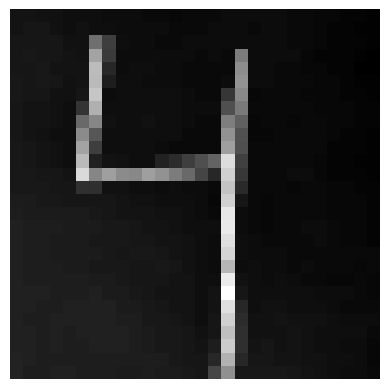



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
True is: 5, net answer is 5


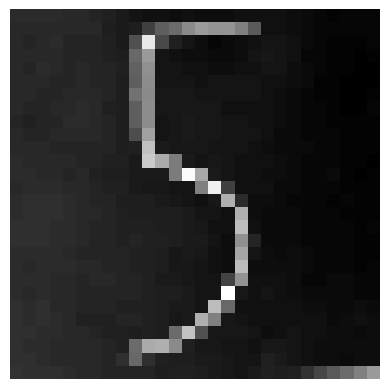



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
True is: 6, net answer is 5


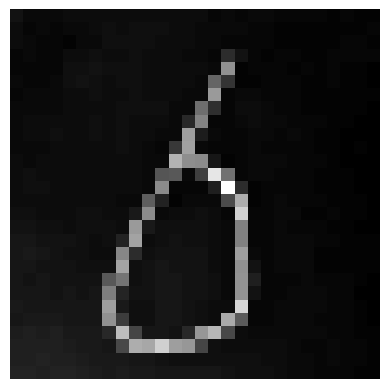



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
True is: 7, net answer is 5


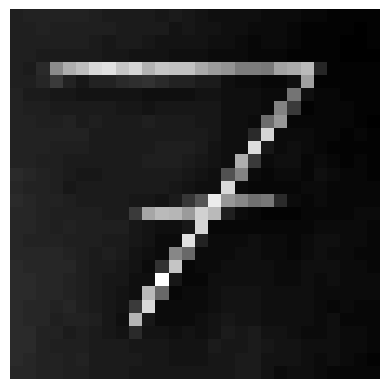



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
True is: 8, net answer is 5


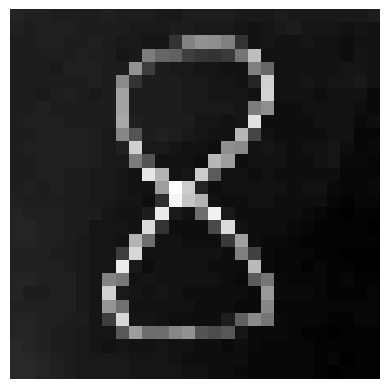



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
True is: 9, net answer is 5


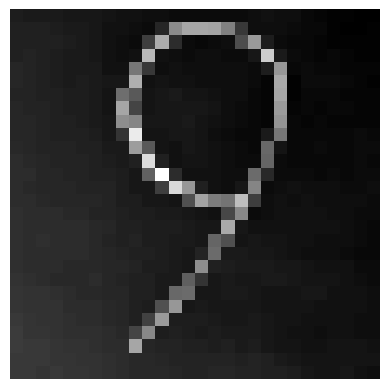



Net Ascending is 0.200000


In [ ]:
reshape_images, images_count = getImages()
normalized_images = (255-reshape_images)/255

true_predict = 0

for i, image in enumerate(normalized_images):
  sample = image.reshape([1, 784])

  pred = model.predict(sample)
  pred_label = pred.argmax()

  print(f'True is: {i}, net answer is {pred_label}')

  if(i == pred_label):
    true_predict += 1

  plt.imshow(image.reshape(28, 28), cmap="gray")
  plt.axis("off")
  plt.show()
  print('\n')

print(f'Net Ascending is {float(true_predict/images_count):4f}')